In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential # Models Architecture import
from keras.layers import Dense # Layers of Model import
import seaborn as sns

In [27]:
# READ DATASET AND ANALYZE
diabetes_df = pd.read_csv('diabetes.csv')
result = diabetes_df
result.head()
# result = diabetes_df.columns
# result = diabetes_df.info()
# result = diabetes_df.describe()
# result = diabetes_df.describe().T
# result = diabetes_df.isnull().sum()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
#making a copy of our dataframe beacuse we don't want to break our main dataset
# #and replace NaN values to 0 in order to calculate number of NaN values
diabetes_df_copy = diabetes_df.copy()
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]= diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(diabetes_df_copy.isnull().sum())
diabetes_df_copy.head()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [29]:

#we changed Nan values to 0 and now we will turn that values to their own columns's median values on our copy dataframe
# because we will make predict we don't want to zero values on rows
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].mean(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].mean(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)
print(diabetes_df_copy.isnull().sum())
diabetes_df_copy.head()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [30]:
diabetes_df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']] = diabetes_df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']].apply(np.int64)
diabetes_df_copy
# i changed the float numbers to integer

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155,33,0,50,1
1,1,85,66,29,155,26,0,31,0
2,8,183,64,29,155,23,0,32,1
3,1,89,66,23,94,28,0,21,0
4,0,137,40,35,168,43,2,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32,0,63,0
764,2,122,70,27,155,36,0,27,0
765,5,121,72,23,112,26,0,30,0
766,1,126,60,29,155,30,0,47,1


0    500
1    268
Name: Outcome, dtype: int64


<AxesSubplot:title={'center':'Outcome'}>

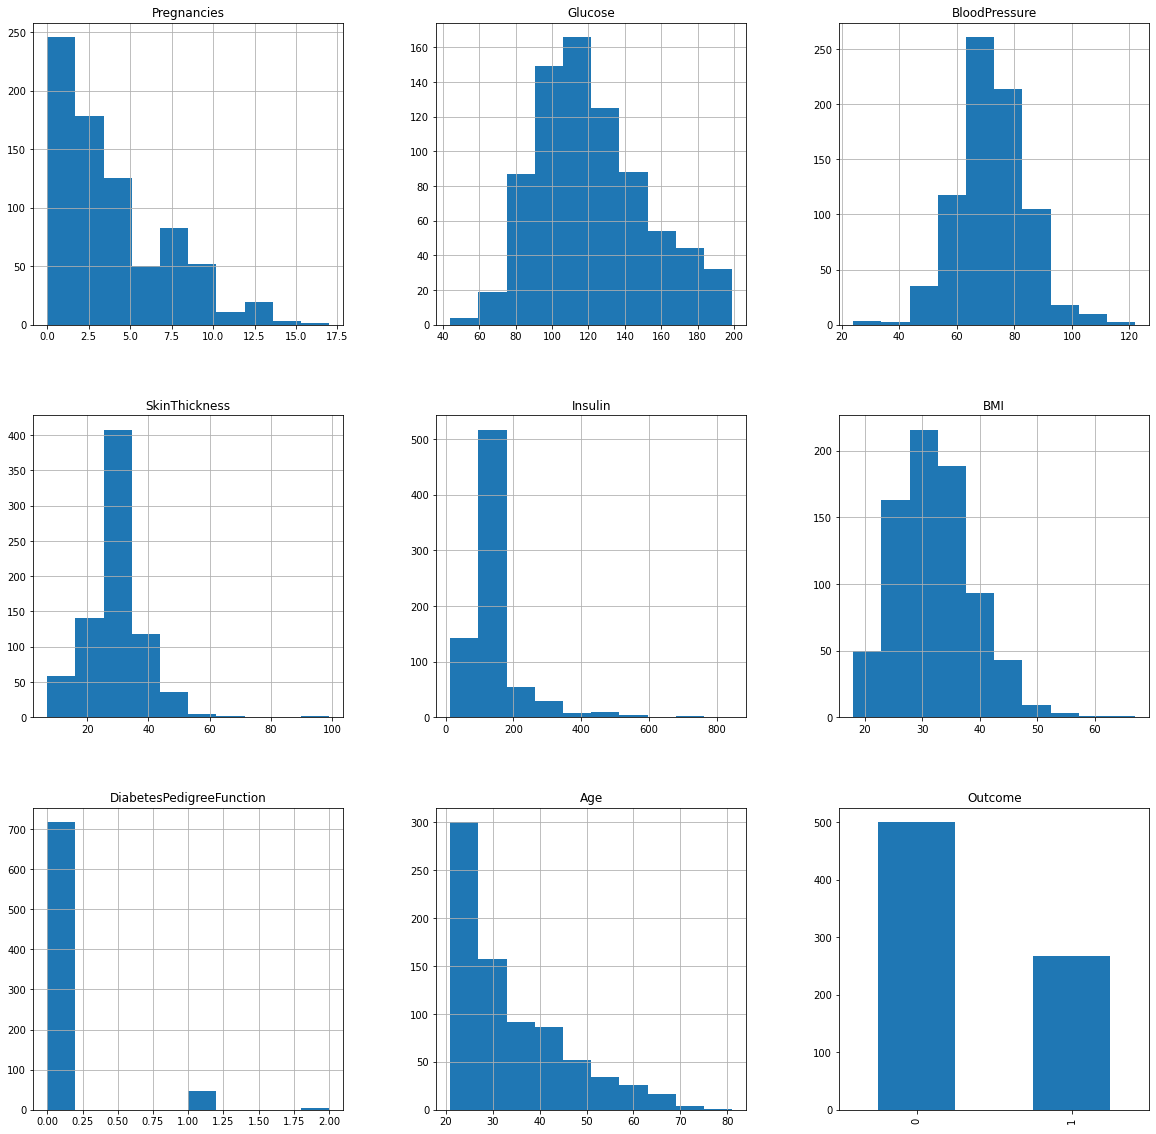

In [31]:
p = diabetes_df_copy.hist(figsize = (20,20))
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")
p
# we see our target column 0 means not diabet, 1 means diabet
#and there is subplots


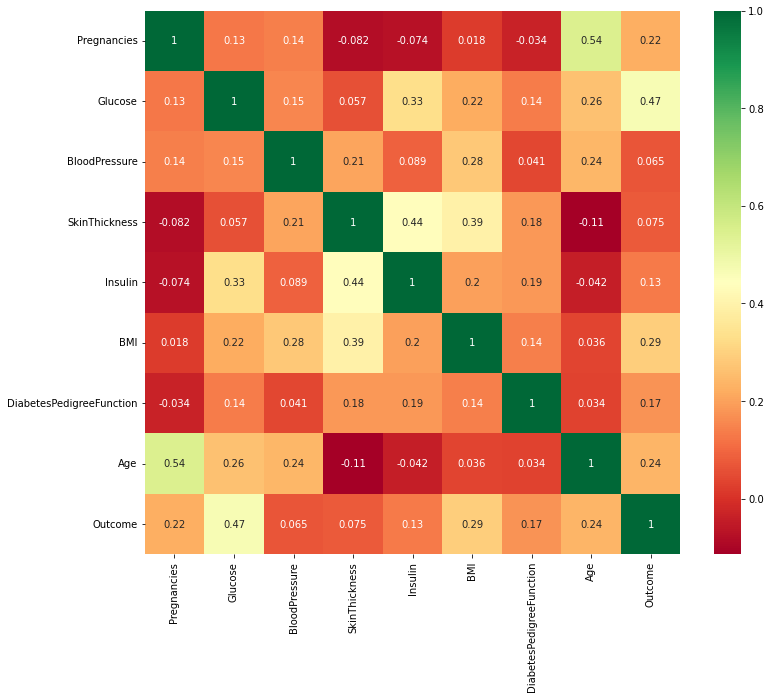

In [32]:
# used seaborn for heatmap
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

In [33]:
diabetes_df_copy.shape

(768, 9)

In [34]:
diabetes_df_copy.drop_duplicates(inplace=True)
# we don't want same things

In [35]:
diabetes_df_copy.shape

(768, 9)

In [36]:
diabetes_df_copy.isnull().sum() # we handled missing datas, data set looks good.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
# converted to an array
dataset = diabetes_df_copy.values
dataset

array([[  6, 148,  72, ...,   0,  50,   1],
       [  1,  85,  66, ...,   0,  31,   0],
       [  8, 183,  64, ...,   0,  32,   1],
       ...,
       [  5, 121,  72, ...,   0,  30,   0],
       [  1, 126,  60, ...,   0,  47,   1],
       [  1,  93,  70, ...,   0,  23,   0]], dtype=int64)

In [38]:
#Get all of the rows from the first nine columns of the data set
X = dataset[:,0:8]  
y = dataset[:,8] # target dataset 
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [39]:
# Processing The Data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.30612245, 0.        ,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.16326531, 0.        ,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.10204082, 0.        ,
        0.18333333],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.16326531, 0.        ,
        0.15      ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.24489796, 0.        ,
        0.43333333],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.24489796, 0.        ,
        0.03333333]])

In [40]:
# 
X_train , X_test , y_train, y_test = train_test_split(X_scale,y,test_size=0.2,random_state=4)

In [41]:
# Build the model

#ANN MODEL
model = Sequential([
    Dense(8,activation='relu',input_shape=(8,)), 
    Dense(4,activation='relu'),
    Dense(1,activation='sigmoid')  
])

In [42]:

model.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

In [43]:
# Train the model
hist = model.fit(X_train,y_train,batch_size=57,epochs=1000,validation_split=0.2)

Epoch 1/1000
9/9 [==============================] - 1s 21ms/step - loss: 0.7098 - accuracy: 0.3686 - val_loss: 0.7044 - val_accuracy: 0.3659
Epoch 2/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.7030 - accuracy: 0.3931 - val_loss: 0.6980 - val_accuracy: 0.4715
Epoch 3/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.4705 - val_loss: 0.6927 - val_accuracy: 0.5610
Epoch 4/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5601 - val_loss: 0.6884 - val_accuracy: 0.6179
Epoch 5/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.6171 - val_loss: 0.6851 - val_accuracy: 0.6504
Epoch 6/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.6852 - accuracy: 0.6354 - val_loss: 0.6822 - val_accuracy: 0.6423
Epoch 7/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.6558 - val_loss: 0.6796 - val_accuracy: 0.6585
Epoch 8/1000
9/9 [=

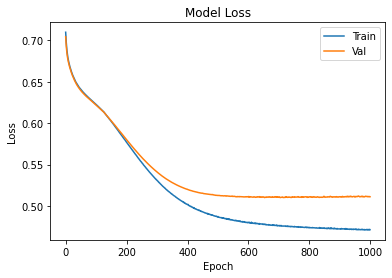

In [44]:

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

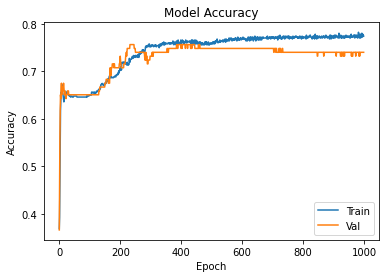

In [45]:
# Visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'lower right')
plt.show()

In [46]:
prediction = model.predict(X_test)
prediction  # prediction for diabetes

5/5 [==============================] - 0s 624us/step


array([[0.17623295],
       [0.08536828],
       [0.0815507 ],
       [0.4228792 ],
       [0.27584407],
       [0.7407669 ],
       [0.6545072 ],
       [0.22940831],
       [0.8730784 ],
       [0.1768477 ],
       [0.41567364],
       [0.08154981],
       [0.15328121],
       [0.08154981],
       [0.13291547],
       [0.5286413 ],
       [0.8715511 ],
       [0.9591892 ],
       [0.08279325],
       [0.08154981],
       [0.08154981],
       [0.64707166],
       [0.15935457],
       [0.8841987 ],
       [0.16421796],
       [0.42075804],
       [0.08802187],
       [0.35462078],
       [0.23194996],
       [0.19431633],
       [0.8898646 ],
       [0.08154981],
       [0.266937  ],
       [0.08154981],
       [0.6411317 ],
       [0.3531007 ],
       [0.48722944],
       [0.665193  ],
       [0.11383043],
       [0.56210434],
       [0.659805  ],
       [0.3454239 ],
       [0.14429978],
       [0.8578726 ],
       [0.12752144],
       [0.08241306],
       [0.24491306],
       [0.919

In [47]:
# Making a prediction and also showing original values
prediction = model.predict(X_test)
prediction = [1 if y > 0.5 else 0 for y in prediction]
print(prediction) 
print(y_test)

5/5 [==============================] - 0s 1ms/step
[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0
 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 1 1]


In [48]:
#Evaluate the model the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(X_train)
pred = [1 if y > 0.5 else 0 for y in pred]
print(classification_report(y_train,pred))
print('Confusion Matrix : \n',confusion_matrix(y_train,pred))
print('Accuracy : ', accuracy_score(y_train,pred))

20/20 [==============================] - 0s 947us/step
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       398
           1       0.71      0.58      0.64       216

    accuracy                           0.77       614
   macro avg       0.75      0.73      0.74       614
weighted avg       0.77      0.77      0.76       614

Confusion Matrix : 
 [[347  51]
 [ 90 126]]
Accuracy :  0.7703583061889251


In [49]:
#Evaluate the model the test data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pred = model.predict(X_test)
pred = [1 if y > 0.5 else 0 for y in pred]
print(classification_report(y_test,pred))
print('Confusion Matrix : \n',confusion_matrix(y_test,pred))
print('Accuracy : ', accuracy_score(y_test,pred))

5/5 [==============================] - 0s 924us/step
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       102
           1       0.74      0.67      0.71        52

    accuracy                           0.81       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154

Confusion Matrix : 
 [[90 12]
 [17 35]]
Accuracy :  0.8116883116883117
